<a href="https://colab.research.google.com/github/Stapa1/Fitness-Insights/blob/main/Fitness_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Fitness Insights: Analyzing Health App Log Data for Exercise and Activity Patterns***
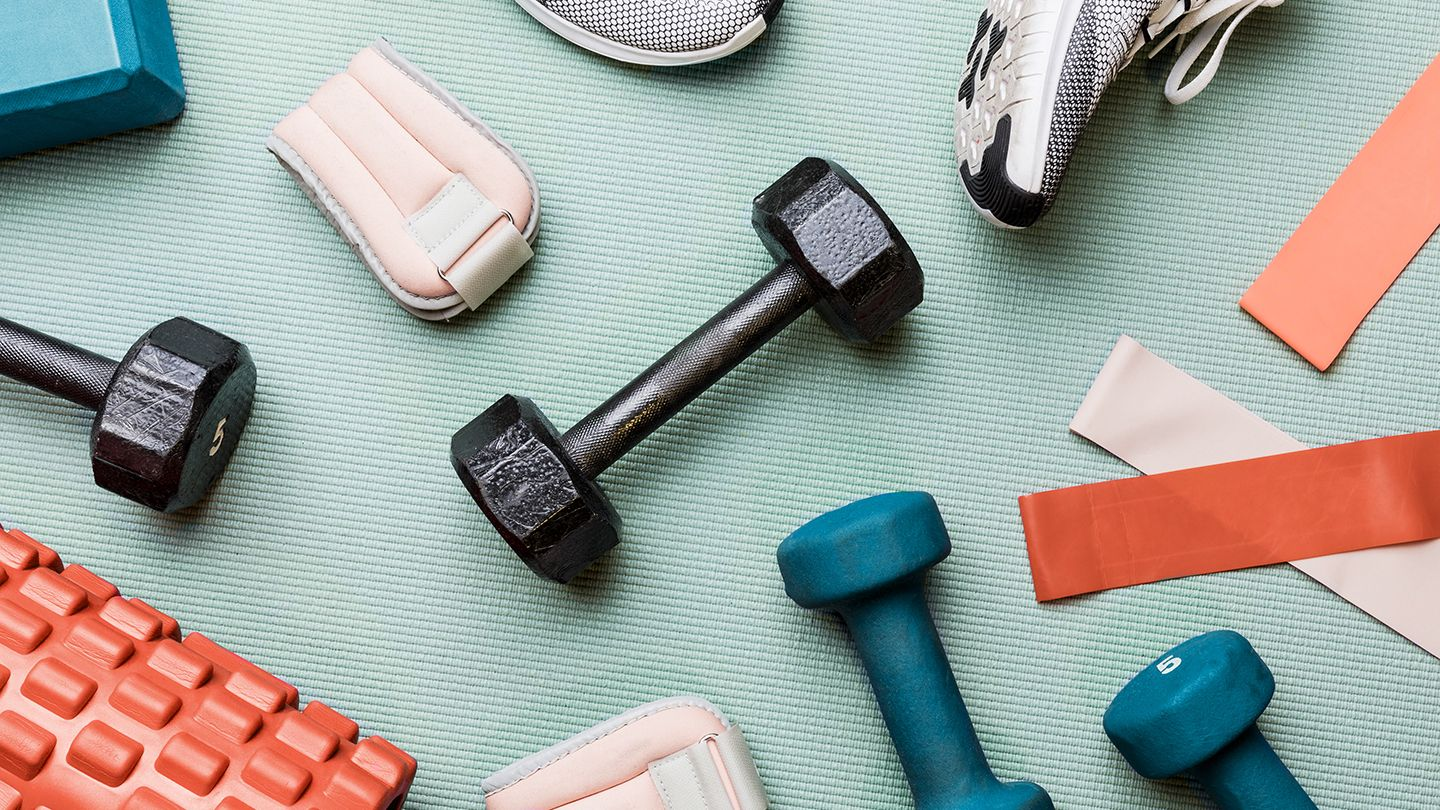

Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
#Loading the log data
log_data = pd.read_csv('HealthApp_2k.log_structured.csv')

Data Preprocessing

In [23]:
# Displaying the first few rows of the data
print(log_data.head())

   LineId                   Time                 Component       Pid  \
0       1  20171223-22:15:29:606                  Step_LSC  30002312   
1       2  20171223-22:15:29:615                  Step_LSC  30002312   
2       3  20171223-22:15:29:633  Step_StandReportReceiver  30002312   
3       4  20171223-22:15:29:635                  Step_LSC  30002312   
4       5  20171223-22:15:29:635     Step_StandStepCounter  30002312   

                                             Content EventId  \
0                            onStandStepChanged 3579     E42   
1                      onExtend:1514038530000 14 0 4     E39   
2  onReceive action: android.intent.action.SCREEN_ON     E41   
3  processHandleBroadcastAction action:android.in...     E43   
4                                  flush sensor data     E12   

                                       EventTemplate  
0                             onStandStepChanged <*>  
1                           onExtend:<*> <*> <*> <*>  
2  onReceive acti

In [25]:
# Getting information about the data types and missing values
print(log_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB
None


In [26]:
# Summary statistics of numerical columns
print(log_data.describe())

            LineId         Pid
count  2000.000000      2000.0
mean   1000.500000  30002312.0
std     577.494589         0.0
min       1.000000  30002312.0
25%     500.750000  30002312.0
50%    1000.500000  30002312.0
75%    1500.250000  30002312.0
max    2000.000000  30002312.0


In [27]:
log_data['Time'] = pd.to_datetime(log_data['Time'], format='%Y%m%d-%H:%M:%S:%f')
log_data['TotalSteps'] = log_data['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
log_data['Altitude'] = log_data['Content'].str.extract(r'totalAltitude=(\d+)').astype(float)

In [28]:
# Daily step count
daily_step_count = log_data.groupby(log_data['Time'].dt.date)['TotalSteps'].sum()

# Active times
active_times = log_data[log_data['TotalSteps'] > 0].groupby(log_data['Time'].dt.date)['Time'].count()

# Work-out sessions
workout_sessions = log_data[log_data['Component'] == 'Step_LSC'][['Time', 'Content']]
workout_sessions['WorkoutSession'] = workout_sessions['Content'].str.extract(r'onStandStepChanged (\d+)').astype(float)
workout_sessions = workout_sessions.groupby(workout_sessions['Time'].dt.date)['WorkoutSession'].count()


#**What is the range of altitude values in the dataset?**

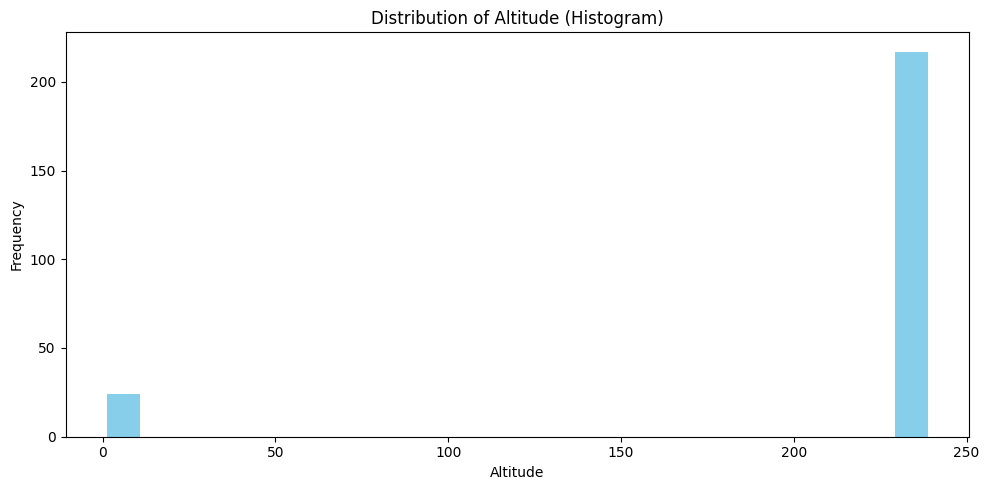

In [38]:


# Setting a figure size
plt.figure(figsize=(10, 5))
# Distribution of Altitude (Histogram)
plt.hist(log_data['Altitude'], bins=20, rwidth=0.8, color='skyblue')
plt.title('Distribution of Altitude (Histogram)')
plt.xlabel('Altitude')
plt.ylabel('Frequency')
# Ensure the plot fits well in the figure without cropping
plt.tight_layout()
plt.show()


# **How does the person's daily step count vary over time?**

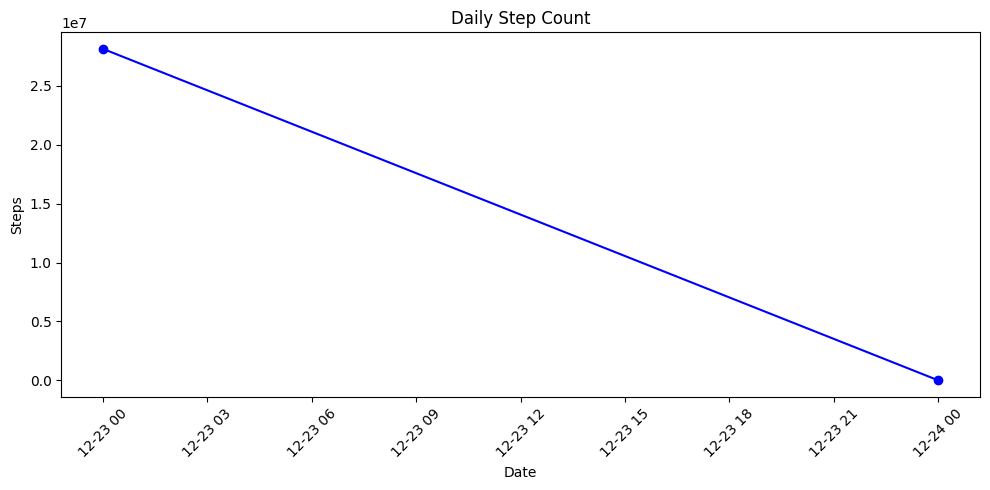

In [10]:
# Create a new figure with a specific size (width: 10, height: 5)
plt.figure(figsize=(10, 5))

# Plot the data using a line chart
plt.plot(daily_step_count.index, daily_step_count.values, marker='o', linestyle='-', color='b')
plt.title('Daily Step Count')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)

# Ensure the plot fits well in the figure without cropping
plt.tight_layout()
plt.show()



# **What time the person most active?**

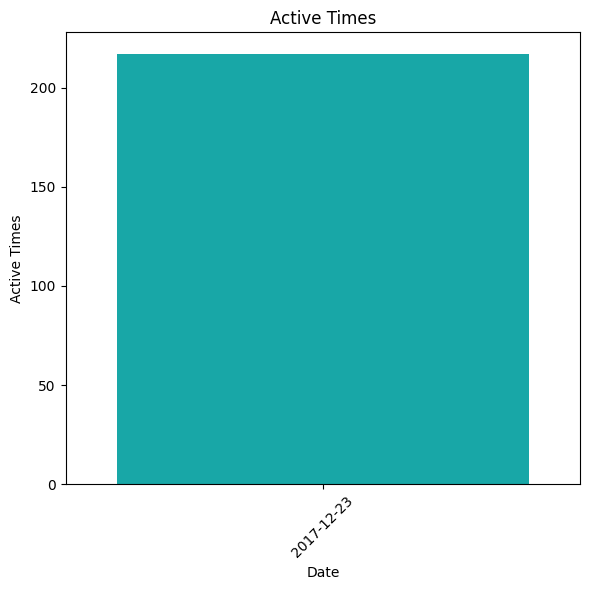

In [39]:
# Setting a figure size
plt.figure(figsize=(6, 6))

# Generate a bar chart using Seaborn's barplot function
sns.barplot(x=active_times.index, y=active_times.values, color='c')

plt.title('Active Times')
plt.xlabel('Date')
plt.ylabel('Active Times')
plt.xticks(rotation=45)

# Ensure the plot fits well in the figure without cropping
plt.tight_layout()
plt.show()


# **How often does the person engage in work-out sessions?**

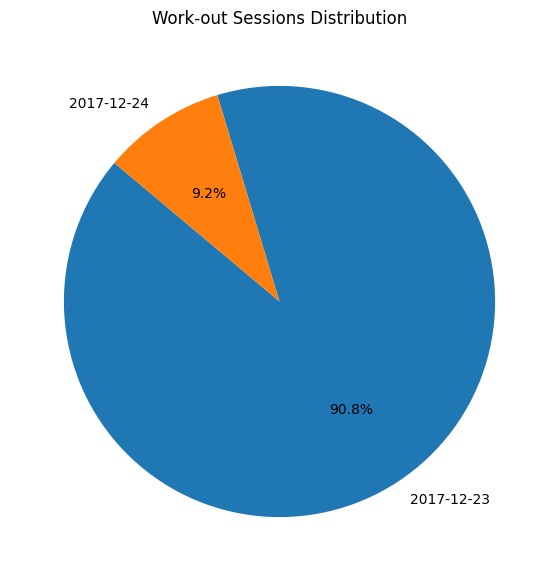

In [12]:
# Setting a figure size
plt.figure(figsize=(7, 7))

# Generate a pie chart
plt.pie(workout_sessions.values, labels=workout_sessions.index, autopct='%1.1f%%', startangle=140)
plt.title('Work-out Sessions Distribution')
plt.show()


# **What is the typical range of daily step counts?**

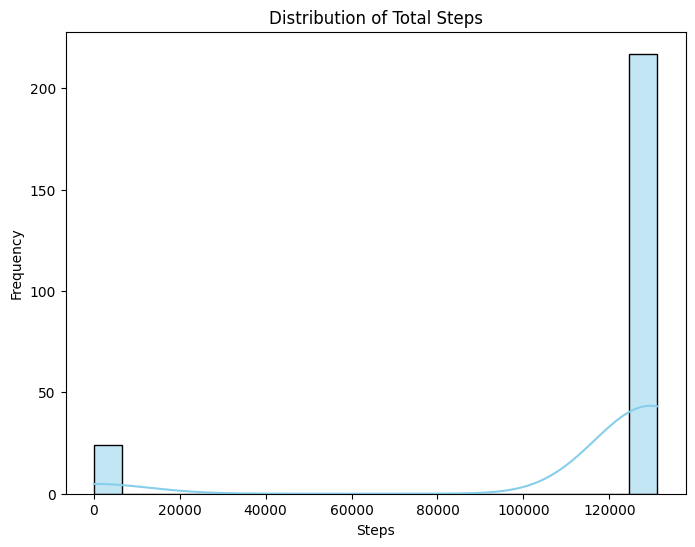

In [14]:
# Setting a figure size
plt.figure(figsize=(8, 6))

# Generate a histogram using Seaborn's histplot function
sns.histplot(log_data['TotalSteps'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Total Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()


# **How does the person's daily step count vary over time?**

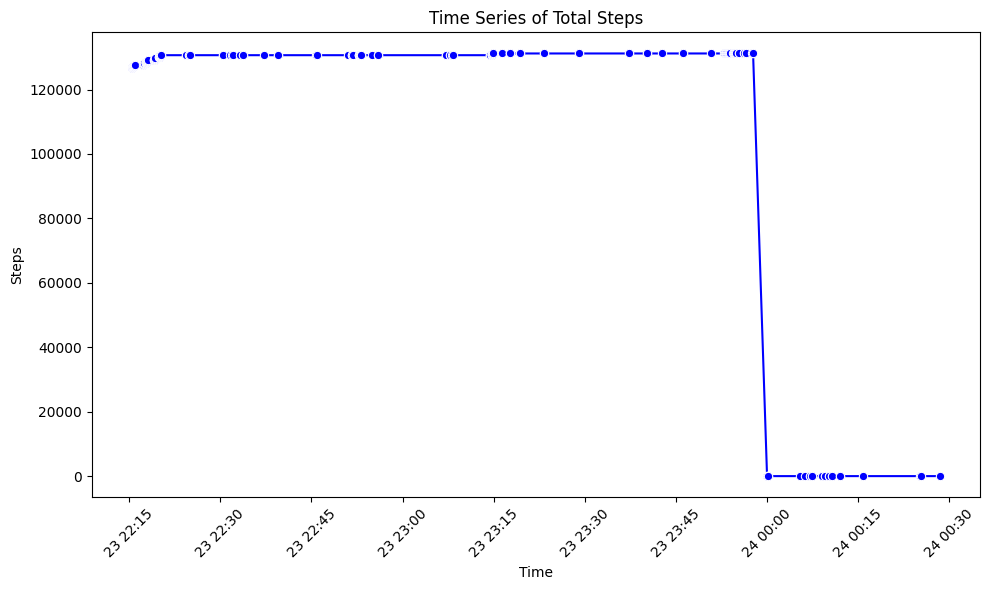

In [16]:
# Setting a figure size
plt.figure(figsize=(10, 6))
# Generate a time series plot using Seaborn's lineplot function
sns.lineplot(x=log_data['Time'], y=log_data['TotalSteps'], marker='o', color='b')
plt.title('Time Series of Total Steps')
plt.xlabel('Time')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Are there correlations between step counts and other metrics like altitude or calories burned?**

<ipython-input-40-a71c56b3e195>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = log_data.corr()


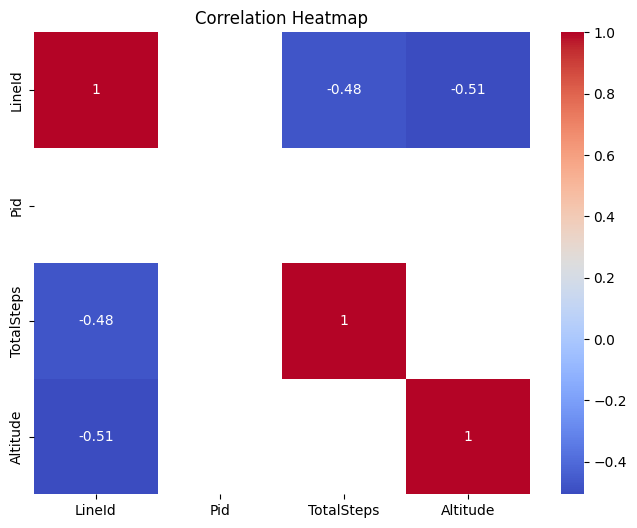

In [40]:
# Setting a figure size
plt.figure(figsize=(8, 6))
correlation_matrix = log_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# **Is there a relationship between altitude and step counts?**

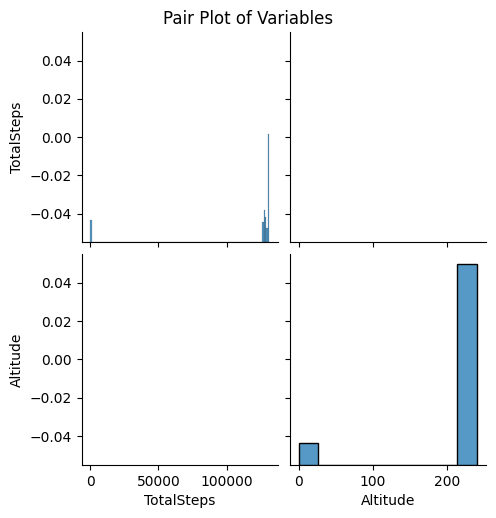

In [18]:
# Generate a pair plot using Seaborn's pairplot function
sns.pairplot(log_data[['TotalSteps', 'Altitude']])
# Add a super title above the pair plot
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()
